# Modelo de Análise de Dados

### Sugestões de análises e insights que podem ser obtidos:



## 1. Desempenho de Vendas:

Total de Vendas: Calcular o total de R$ faturados em um determinado período.

Vendas por Cliente: Identificar quais clientes têm maior volume de compras e quais são mais rentáveis.

In [85]:
import numpy as n
import pandas as pd

# Carregar o ficheiro Excel
file_path = "Introdução_Vendas.xlsx"  

# Carregar os dados
df = pd.read_excel(file_path, sheet_name="Faturamento")

# Ajustar os cabeçalhos corretamente
df.columns = df.iloc[0]  # Definir a primeira linha como cabeçalho
df = df[1:]  # Remover a linha duplicada
df = df.reset_index(drop=True)  # Resetar o índice

# Renomear colunas
df = df.rename(columns={"R$ Faturados": "Faturamento", "Data Emissão Pedido": "Data"})

# Converter tipos de dados
df["Data"] = pd.to_datetime(df["Data"], errors='coerce')
df["Faturamento"] = pd.to_numeric(df["Faturamento"], errors='coerce')

# Definir período para cálculo
data_inicio = "2019-01-01"
data_fim = "2021-12-31"

# Filtrar os dados dentro do período
df_filtrado = df[(df["Data"] >= data_inicio) & (df["Data"] <= data_fim)]

# Calcular total faturado
total_faturado = df_filtrado["Faturamento"].sum()

# Exibir o total faturado
display(f"Total faturado de {data_inicio} a {data_fim}: R$ {total_faturado:.2f}")


'Total faturado de 2019-01-01 a 2021-12-31: R$ 3260242.20'

In [114]:
import pandas as pd

# Carregar o ficheiro Excel
file_path = "Introdução_Vendas.xlsx"  # Altere para o caminho correto do ficheiro

# Carregar os dados
df = pd.read_excel(file_path, sheet_name="Faturamento")

# Ajustar os cabeçalhos corretamente
df.columns = df.iloc[0]  # Definir a primeira linha como cabeçalho
df = df[1:]  # Remover a linha duplicada
df = df.reset_index(drop=True)  # Resetar o índice

# Renomear colunas
df = df.rename(columns={"R$ Faturados": "Faturamento", "Cliente": "Cliente", "Itens": "Quantidade"})

# Converter tipos de dados
df["Faturamento"] = pd.to_numeric(df["Faturamento"], errors='coerce')
df["Quantidade"] = pd.to_numeric(df["Quantidade"], errors='coerce')

# Agrupar por Cliente para calcular total faturado e volume de compras
df_agrupado = df.groupby("Cliente").agg(
    Total_Faturado=("Faturamento", "sum"),
    Total_Itens_Comprados=("Quantidade", "sum")
).reset_index()

# Ordenar os clientes mais rentáveis e com maior volume de compras
df_mais_rentaveis = df_agrupado.sort_values(by="Total_Faturado", ascending=False)
df_maior_volume = df_agrupado.sort_values(by="Total_Itens_Comprados", ascending=False)

# Exibir os 10 clientes mais rentáveis
display("Top 10 Clientes Mais Rentáveis:")
display(df_mais_rentaveis.head(10))

# Exibir os 10 clientes com maior volume de compras
display("Top 10 Clientes com Maior Volume de Compras:")
display(df_maior_volume.head(10))


'Top 10 Clientes Mais Rentáveis:'

,Cliente,Total_Faturado,Total_Itens_Comprados
7,WALMART,637977.4,19809
2,CASAS BAHIA,572673.5,17642
6,SHOPTIME,482608.4,15033
3,MAGAZINE LUIZA,452438.4,13731
4,PONTO FRIO,389670.7,12201
0,AMERICANAS,313944.3,9859
1,CASA E VIDEO,230382.1,7240
5,RICARDO ELETRO,180547.4,5583


'Top 10 Clientes com Maior Volume de Compras:'

,Cliente,Total_Faturado,Total_Itens_Comprados
7,WALMART,637977.4,19809
2,CASAS BAHIA,572673.5,17642
6,SHOPTIME,482608.4,15033
3,MAGAZINE LUIZA,452438.4,13731
4,PONTO FRIO,389670.7,12201
0,AMERICANAS,313944.3,9859
1,CASA E VIDEO,230382.1,7240
5,RICARDO ELETRO,180547.4,5583


## 2. Eficiência de Entrega:

Dias Para Entrega: Analisar a média de dias entre a data de emissão do pedido e a data de entrega real. Isso pode ajudar a identificar atrasos e a eficiência do processo de entrega.

Comparação entre Datas: Comparar a data de entrega prevista com a data de entrega real para avaliar a precisão das previsões

## 3. Volume e Peso dos Pedidos:

Análise de Volume e Peso: Avaliar como o volume e o peso dos pedidos afetam os custos de frete e a logística de entrega. Isso pode ajudar a otimizar o planejamento das rotas e a capacidade de carga dos veículos.

## 4. Custo de Frete:

Análise do Frete (R$/M3): Identificar quais pedidos têm maior custo de frete por metro cúbico e investigar se esses custos são justificados pelas características do pedido (distância, peso, etc.).

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o ficheiro Excel
file_path = "Introdução_Vendas.xlsx"  # Altere para o caminho correto do ficheiro

# Carregar os dados
df = pd.read_excel(file_path, sheet_name="Faturamento")

# Ajustar os cabeçalhos corretamente
df.columns = df.iloc[0]  # Definir a primeira linha como cabeçalho
df = df[1:]  # Remover a linha duplicada
df = df.reset_index(drop=True)  # Resetar o índice

# Renomear colunas para facilitar a análise
df = df.rename(columns={
    "Nº Pedido": "Pedido",
    "Destino": "Destino",
    "Frete (R$/M3)": "Frete_R$/m3",
    "Peso (KG)": "Peso_KG",
    "Volume (m3)": "Volume_m3"
})

# Converter tipos de dados
df["Frete_R$/m3"] = pd.to_numeric(df["Frete_R$/m3"], errors='coerce')
df["Peso_KG"] = pd.to_numeric(df["Peso_KG"], errors='coerce')
df["Volume_m3"] = pd.to_numeric(df["Volume_m3"], errors='coerce')

# Identificar pedidos com maior custo de frete por metro cúbico
df_frete_alto = df.sort_values(by="Frete_R$/m3", ascending=False).head(10)

# Exibir os pedidos com maior custo de frete por m³
display("Top 10 Pedidos com Maior Custo de Frete por m³:")
display(df_frete_alto[["Pedido", "Destino", "Frete_R$/m3", "Peso_KG", "Volume_m3"]])

# Analisar correlação entre frete, peso e volume
correlacao = df[["Frete_R$/m3", "Peso_KG", "Volume_m3"]].corr()
display("Correlação entre Frete, Peso e Volume:")
display(correlacao)


'Top 10 Pedidos com Maior Custo de Frete por m³:'

,Pedido,Destino,Frete_R$/m3,Peso_KG,Volume_m3
6783,6784,RJ,17.0,741,57
8612,8613,RJ,17.0,72,12
4507,4508,RJ,17.0,108,12
500,501,SP,17.0,24,24
2635,2636,SP,17.0,13,13
2633,2634,RJ,17.0,30,2
4511,4512,BH,17.0,216,54
5873,5874,BH,17.0,22,11
1927,1928,RJ,17.0,130,26
5858,5859,RJ,17.0,24,12


'Correlação entre Frete, Peso e Volume:'

,Frete_R$/m3,Peso_KG,Volume_m3
0,,,
Frete_R$/m3,1.000000,-0.012866,-0.011003
Peso_KG,-0.012866,1.000000,0.741530
Volume_m3,-0.011003,0.741530,1.000000


## 5. Devoluções:

Análise de Devoluções: Examinar a quantidade de devoluções e os motivos. Isso pode ajudar a identificar problemas com produtos ou processos e melhorar a satisfação do cliente

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o ficheiro Excel
file_path = "Introdução_Vendas.xlsx"  

# Carregar os dados
df = pd.read_excel(file_path, sheet_name="Faturamento")

# Ajustar os cabeçalhos corretamente
df.columns = df.iloc[0]  # Definir a primeira linha como cabeçalho
df = df[1:]  # Remover a linha duplicada
df = df.reset_index(drop=True)  # Resetar o índice

# Renomear colunas para facilitar a análise
df = df.rename(columns={
    "Nº Pedido": "Pedido",
    "Qtd Devolução": "Devoluções",
    "Mot. Devolução": "Motivo_Devolucao"
})

# Verificar se as colunas necessárias existem
if "Devoluções" not in df.columns or "Motivo_Devolucao" not in df.columns:
    print("As colunas de devoluções não foram encontradas no dataset.")
else:
    # Converter para numérico
    df["Devoluções"] = pd.to_numeric(df["Devoluções"], errors='coerce')

    # Remover valores nulos e filtrar pedidos que tiveram devoluções
    df_devolucoes = df[df["Devoluções"] > 0]

    # Contar a quantidade total de devoluções
    total_devolucoes = df_devolucoes["Devoluções"].sum()
    print(f"Total de Devoluções: {total_devolucoes}")

    # Analisar os principais motivos de devolução
    df_motivos = df_devolucoes.groupby("Motivo_Devolucao")["Devoluções"].sum().reset_index()
    df_motivos = df_motivos.sort_values(by="Devoluções", ascending=False)

    print("\nMotivos das Devoluções:")
    print(df_motivos)

    # Criar um gráfico de barras para os principais motivos de devolução
    plt.figure(figsize=(12,6))
    sns.barplot(x="Devoluções", y="Motivo_Devolucao", data=df_motivos, palette="Reds_r")
    plt.xlabel("Número de Devoluções")
    plt.ylabel("Motivo da Devolução")
    plt.title("Principais Motivos de Devolução")
    plt.show()


As colunas de devoluções não foram encontradas no dataset.


## 6. Desempenho do Motorista:

Tempo de Viagem: Analisar o tempo de viagem dos motoristas e a eficiência das rotas. Isso pode ajudar a identificar motoristas que se destacam, bem como áreas para melhoria.

Impacto nas Entregas: Avaliar se há correlação entre o desempenho dos motoristas e o cumprimento dos prazos de entrega.

'Top 10 Motoristas com Menor Tempo Médio de Viagem:'

,Motorista,Media_Tempo_Viagem,Pedidos_Entregues
4,KAIO BORGES,6.391396,953
9,VALDIR ESPINOSA,6.400000,985
7,PAULO RAMOS,6.403720,914
3,JOÃO GOMES,6.411392,948
0,DIEGO LOPES,6.467772,1086
8,TÚLIO SILVEIRA,6.473684,969
1,FELIPE SILVA,6.483660,918
5,LUIZ PARDAL,6.541992,1024
2,GABRIEL MARTINS,6.672316,885
6,MARCOS LEROY,6.752976,1008


C:\Users\thays\AppData\Local\Temp\ipykernel_14748\2885972304.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Media_Tempo_Viagem", y="Motorista", data=df_motorista_rapido.head(10), palette="Blues_r")


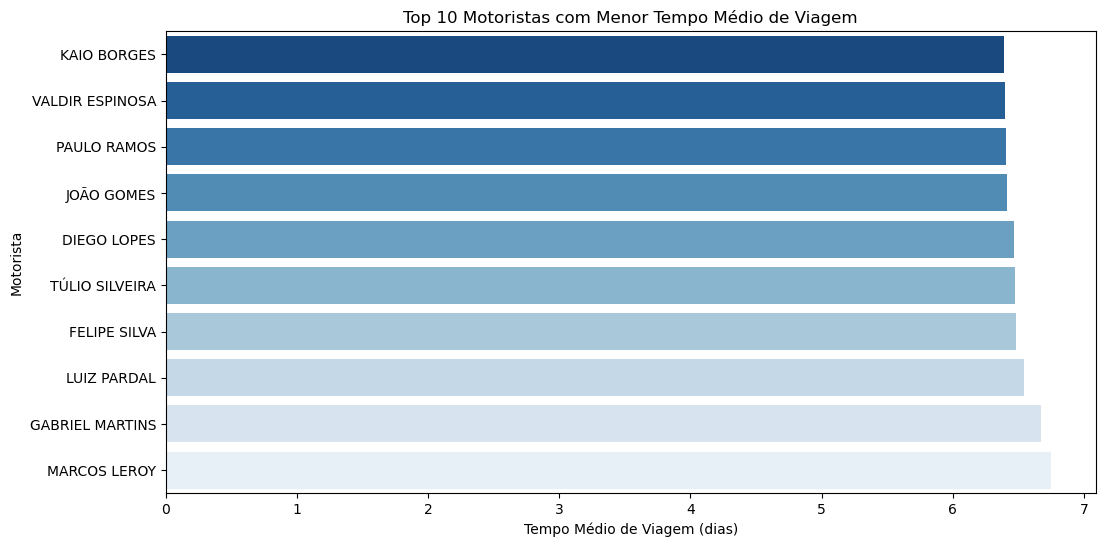

'Top 10 Destinos com Maior Tempo Médio de Viagem:'

,Destino,Media_Tempo_Viagem,Total_Pedidos
0,BH,6.621903,3269
1,RJ,6.464365,3157
2,SP,6.412684,3264


C:\Users\thays\AppData\Local\Temp\ipykernel_14748\2885972304.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Media_Tempo_Viagem", y="Destino", data=df_destino_lento.head(10), palette="Reds_r")


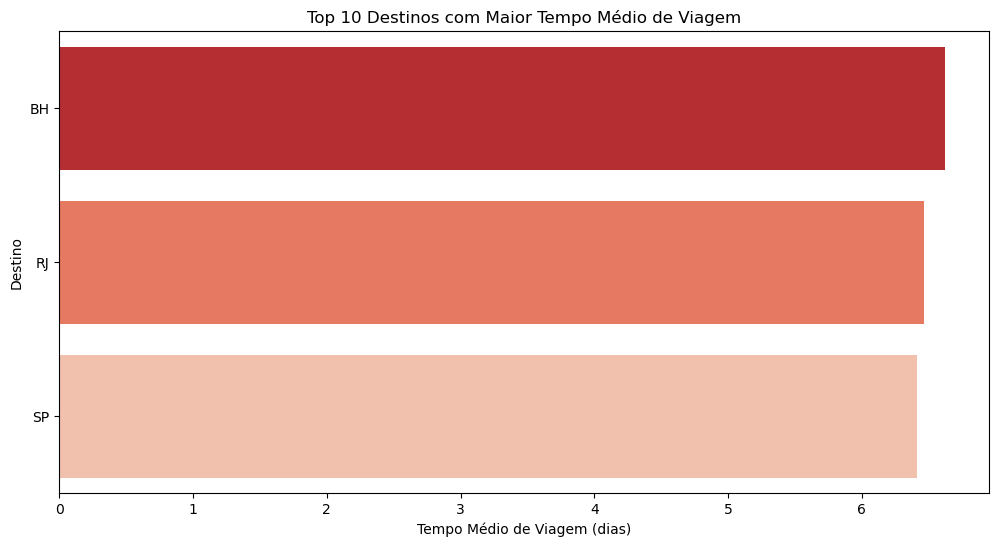

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o ficheiro Excel
file_path = "Introdução_Vendas.xlsx"  # Altere para o caminho correto do ficheiro

# Carregar os dados
df = pd.read_excel(file_path, sheet_name="Faturamento")

# Ajustar os cabeçalhos corretamente
df.columns = df.iloc[0]  # Definir a primeira linha como cabeçalho
df = df[1:]  # Remover a linha duplicada
df = df.reset_index(drop=True)  # Resetar o índice

# Renomear colunas para facilitar a análise
df = df.rename(columns={
    "Motorista": "Motorista",
    "Destino": "Destino",
    "Tempo de Viagem": "Tempo_Viagem",
    "Data Emissão Pedido": "Data_Pedido",
    "Data Entrega Real": "Data_Entrega_Real"
})

# Converter colunas para os tipos adequados
df["Tempo_Viagem"] = pd.to_numeric(df["Tempo_Viagem"], errors='coerce')
df["Data_Pedido"] = pd.to_datetime(df["Data_Pedido"], errors='coerce')
df["Data_Entrega_Real"] = pd.to_datetime(df["Data_Entrega_Real"], errors='coerce')

# Calcular a diferença real de tempo entre emissão do pedido e entrega
df["Dias_Reais_Entrega"] = (df["Data_Entrega_Real"] - df["Data_Pedido"]).dt.days

# Análise por motorista: Tempo médio de viagem
df_motorista = df.groupby("Motorista").agg(
    Media_Tempo_Viagem=("Tempo_Viagem", "mean"),
    Pedidos_Entregues=("Motorista", "count")
).reset_index()

# Ordenar os motoristas mais rápidos
df_motorista_rapido = df_motorista.sort_values(by="Media_Tempo_Viagem", ascending=True)

# Exibir os motoristas mais rápidos
display("Top 10 Motoristas com Menor Tempo Médio de Viagem:")
display(df_motorista_rapido.head(10))

# Criar gráfico dos motoristas mais rápidos
plt.figure(figsize=(12,6))
sns.barplot(x="Media_Tempo_Viagem", y="Motorista", data=df_motorista_rapido.head(10), palette="Blues_r")
plt.xlabel("Tempo Médio de Viagem (dias)")
plt.ylabel("Motorista")
plt.title("Top 10 Motoristas com Menor Tempo Médio de Viagem")
plt.show()

# Análise por destino: Tempo médio de viagem por rota
df_destino = df.groupby("Destino").agg(
    Media_Tempo_Viagem=("Tempo_Viagem", "mean"),
    Total_Pedidos=("Destino", "count")
).reset_index()

# Ordenar os destinos com maior tempo médio de viagem
df_destino_lento = df_destino.sort_values(by="Media_Tempo_Viagem", ascending=False)

# Exibir os destinos mais demorados
display("Top 10 Destinos com Maior Tempo Médio de Viagem:")
display(df_destino_lento.head(10))

# Criar gráfico dos destinos mais demorados
plt.figure(figsize=(12,6))
sns.barplot(x="Media_Tempo_Viagem", y="Destino", data=df_destino_lento.head(10), palette="Reds_r")
plt.xlabel("Tempo Médio de Viagem (dias)")
plt.ylabel("Destino")
plt.title("Top 10 Destinos com Maior Tempo Médio de Viagem")
plt.show()


## 7. Análise de Destinos:

Mapeamento de Destinos: Analisar quais destinos têm mais pedidos e se há padrões que podem ser utilizados para otimizar rotas e melhorar a logística.

Custos de Entrega por Destino: Avaliar se determinados destinos têm custos de entrega mais altos e investigar as razões.

In [118]:
# Verificar os nomes das colunas
print("Nomes das colunas:", df.columns.tolist())

# Renomear colunas (se necessário, mas pode ser que não precise)
# Certifique-se de que os nomes estão corretos
df = df.rename(columns={"Destino": "Destino", "Nº Pedido": "Pedidos", "Faturamento": "Faturamento"})

# Converter tipos de dados
# Verifique se a coluna "Faturamento" existe
if 'Faturamento' in df.columns:
    df["Pedidos"] = pd.to_numeric(df["Pedidos"], errors='coerce')
    df["Faturamento"] = pd.to_numeric(df["Faturamento"], errors='coerce')
else:
    print("Coluna 'Faturamento' não encontrada.")

# Contar número de pedidos por destino
df_destinos = df.groupby("Destino").agg(
    Total_Pedidos=("Pedidos", "count"),
    Total_Faturado=("Faturamento", "sum")
).reset_index()

# Ordenar os destinos com mais pedidos
df_destinos_ordenado = df_destinos.sort_values(by="Total_Pedidos", ascending=False)

# Exibir os principais destinos
display("Top 10 Destinos com Mais Pedidos:")
display(df_destinos_ordenado.head(10))



Nomes das colunas: [nan, 'Pedidos', 'Cliente', 'Quantidade', 'Volume (m3)', 'Peso (KG)', 'Motorista', 'Data Emissão Pedido', 'Data Entrega Prevista', 'Destino', 'Faturamento', 'Frete (R$/M3)', 'Saída para Entrega', 'Data Entrega Real', ' Qtd Devolução', 'Mot. Devolução', 'Dias Para Entrega', 'Status', 'Dias Interno', 'Tempo de Viagem']


'Top 10 Destinos com Mais Pedidos:'

,Destino,Total_Pedidos,Total_Faturado
0,BH,3269,1108744.6
2,SP,3264,1076315.6
1,RJ,3157,1075182.0


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o ficheiro Excel
file_path = "Introdução_Vendas.xlsx"  

# Carregar os dados
df = pd.read_excel(file_path, sheet_name="Faturamento")

# Ajustar os cabeçalhos corretamente
df.columns = df.iloc[0]  # Definir a primeira linha como cabeçalho
df = df[1:]  # Remover a linha duplicada
df = df.reset_index(drop=True)  # Resetar o índice

# Renomear colunas para facilitar a análise
df = df.rename(columns={"Destino": "Destino", "Frete (R$/M3)": "Custo_Entrega", "Volume (m3)": "Volume"})

# Converter tipos de dados
df["Custo_Entrega"] = pd.to_numeric(df["Custo_Entrega"], errors='coerce')
df["Volume"] = pd.to_numeric(df["Volume"], errors='coerce')

# Calcular o custo médio de entrega por destino
df_custos = df.groupby("Destino").agg(
    Custo_Médio_Entrega=("Custo_Entrega", "mean"),
    Volume_Total=("Volume", "sum")
).reset_index()

# Ordenar os destinos com maiores custos médios de entrega
df_custos_ordenado = df_custos.sort_values(by="Custo_Médio_Entrega", ascending=False)

# Exibir os principais destinos com maiores custos médios de entrega
display("Top 10 Destinos com Maiores Custos Médios de Entrega:")
display(df_custos_ordenado.head(10))

'Top 10 Destinos com Maiores Custos Médios de Entrega:'

,Destino,Custo_Médio_Entrega,Volume_Total
0,BH,16.182655,68515
2,SP,16.180913,66503
1,RJ,16.175610,66536


## 8. Análise de Status:

Status dos Pedidos: Avaliar a proporção de pedidos que foram entregues dentro do prazo versus os que tiveram problemas (atrasos, devoluções, etc.).

'Distribuição dos Status dos Pedidos:'

,Status,Quantidade
0,Atrasado,7106
1,Dentro do Prazo,2584


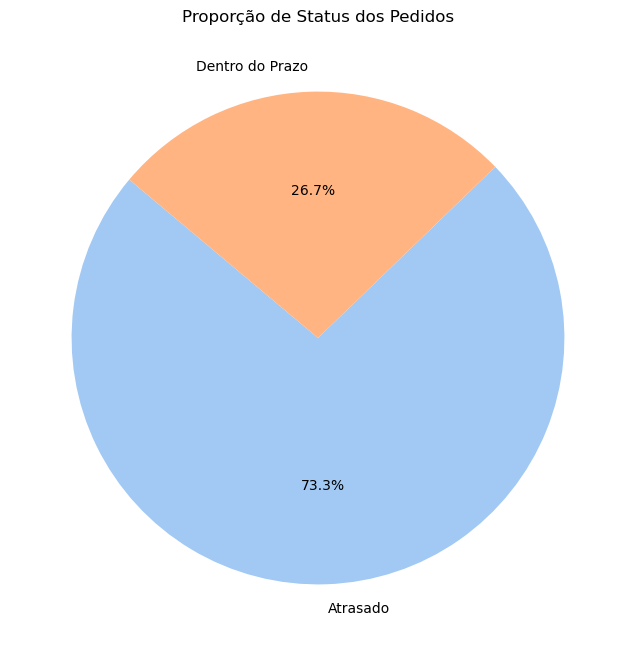

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o ficheiro Excel
file_path = "Introdução_Vendas.xlsx"  # Altere para o caminho correto do ficheiro

# Carregar os dados
df = pd.read_excel(file_path, sheet_name="Faturamento")

# Ajustar os cabeçalhos corretamente
df.columns = df.iloc[0]  # Definir a primeira linha como cabeçalho
df = df[1:]  # Remover a linha duplicada
df = df.reset_index(drop=True)  # Resetar o índice

# Renomear colunas para facilitar a análise
df = df.rename(columns={
    "Nº Pedido": "Pedido",
    "Status": "Status",
    "Qtd Devolução": "Devoluções"
})

# Verificar se as colunas necessárias existem
if "Status" not in df.columns:
    print("A coluna 'Status' não foi encontrada no dataset.")
else:
    # Contar a quantidade de pedidos por status
    df_status = df["Status"].value_counts().reset_index()
    df_status.columns = ["Status", "Quantidade"]

    # Exibir os dados de status dos pedidos
    display("Distribuição dos Status dos Pedidos:")
    display(df_status)

    # Criar um gráfico de pizza para visualizar a proporção de status
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette("pastel")  # Cores suaves para o gráfico
    plt.pie(df_status["Quantidade"], labels=df_status["Status"], autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title("Proporção de Status dos Pedidos")
    plt.show()

# Análise de devoluções (se a coluna existir)
if "Devoluções" in df.columns:
    df["Devoluções"] = pd.to_numeric(df["Devoluções"], errors='coerce')
    total_pedidos = len(df)
    total_devolucoes = df["Devoluções"].sum()

    display(f"\nTotal de Pedidos: {total_pedidos}")
    display(f"Total de Devoluções: {total_devolucoes} ({(total_devolucoes / total_pedidos) * 100:.2f}%)")

    # Criar gráfico de barras para visualizar devoluções por status
    df_devolucoes = df.groupby("Status")["Devoluções"].sum().reset_index()

    plt.figure(figsize=(10, 5))
    sns.barplot(x="Status", y="Devoluções", data=df_devolucoes, palette="Reds_r")
    plt.xlabel("Status do Pedido")
    plt.ylabel("Quantidade de Devoluções")
    plt.title("Total de Devoluções por Status do Pedido")
    plt.xticks(rotation=45)
    plt.show()


## 9. Tendências Temporais:

Análise por Período: Realizar análises mensais ou trimestrais para identificar tendências sazonais nas vendas, entregas e devoluções.

## 10. Satisfação do Cliente:

Feedback sobre Entregas: Se houver dados adicionais sobre feedback dos clientes, correlacionar esses dados com as métricas de entrega e devolução pode ajudar a entender a satisfação do cliente.